## Установка PySpark

In [1]:
pip install -q findspark

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [3]:
df_iris = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [4]:
df_iris.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [24]:
df_max = df_iris.groupBy('variety')
df_max.max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [25]:
df_min = df_iris.groupBy('variety')
df_min.min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [26]:
df_avg = df_iris.groupBy('variety')
df_avg.avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [8]:
import matplotlib.pyplot as plt

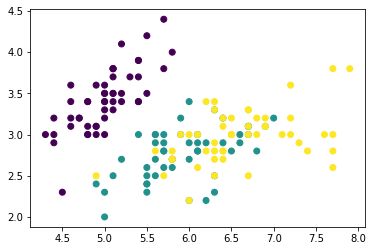

In [10]:
plt.scatter(df_iris[['sepal_length']].collect(), df_iris[['sepal_width']].collect(), c=df_iris[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

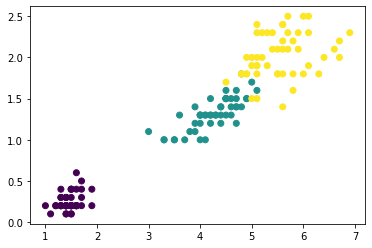

In [13]:
plt.scatter(df_iris[['petal_length']].collect(), df_iris[['petal_width']].collect(), c=df_iris[['variety_num']].collect())

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [14]:
from pyspark.sql.functions import when

In [16]:
df_pred = df_iris.withColumn('prediction', when(df_iris.petal_length < 2, 'Setosa').otherwise('Unknown'))
df_pred.show()

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|    Setosa|
|   

## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [17]:
good_pred = df_pred.where((df_pred.variety == 'Setosa') & (df_pred.prediction == 'Setosa')).count()
good_pred

50

In [18]:
bad_pred = df_pred.where((df_pred.variety != 'Setosa') & (df_pred.prediction == 'Setosa')).count()
bad_pred

0

In [19]:
quality = good_pred / (good_pred + bad_pred)
quality

1.0